In [78]:
import pandas as pd

df = pd.read_csv("stats_MIASHS_etu.csv",     #utiliser pandas en librairie
           sep="|", 
           skiprows=3,                              #supp 3 1eres lignes (car pas données)
           skipfooter=1,                            #supp 1 derniere ligne 
           engine='python'
                )

In [79]:
for col in df.columns : print(col)

Horodateur
How many people live in the city you grew up in? If you grew up in more than one city, choose the one you stayed in the longest.
How many years of higher education have you completed? (Do not take into account this current year).
What net monthly salary do you expect to get in 10 years from now?
How many siblings do you have, including yourself? Example: If you have 2 sisters and 1 brother, write 4.
Include half-siblings - or your step-mother or step-father's children-  if you grew up with them.
If you are an only child, enter 0.
What age group do you belong to?
What is your father's level of education?
What is your mother's level of education?
How tall are you?
What is your gender?
What are you three favourite pets? Use a comma to separate the different pets.
What is your favourite TV show? 


In [80]:
cols =[
    'date_and_time'
    , 'city'
    , 'education'
    , 'salary'
    , 'siblings'
    ,'age'
    , 'mother_edu_level' 
    ,'father_edu_level'
    ,'size'
    ,'gender'
    ,'pets'
    ,'tv_show']

In [81]:
df.columns=cols #pas () car columns pas fonction mais une propriété

In [82]:
df.head(2)

,date_and_time,city,education,salary,siblings,age,mother_edu_level,father_edu_level,size,gender,pets,tv_show
0,2023/01/24 12:54:33 PM UTC+1,105142,2,3500,6,20 - 21 years old,French baccalaureate,Licence,165,Woman,"BIRD, SNAKE, CAT",le meilleur patissier
1,2023/01/24 12:57:59 PM UTC+1,40,2,4000,3,18 - 19 years old,Licence,Licence,175 cm,Woman,"giraffe, cat, swan",brooklyn 99


In [83]:
df=df.drop(columns=['date_and_time']) #suppr colonne dtae_and_time

In [84]:
df.shape #donne dimmensions (shape == propriete donc pas () )

(12, 11)

In [85]:
df.shape[1]

11

In [86]:
df.isna().sum()  # si que df.isna() => renvoie False si valeur vide sinon True
                # df.isna().sum() => renvoie la somme des booléens,false) => nb valeurs manquantes

city                0
education           0
salary              0
siblings            0
age                 0
mother_edu_level    0
father_edu_level    0
size                0
gender              0
pets                0
tv_show             0
dtype: int64

In [87]:
df['city']     # donne le nb d'habitant de chaque ligne (0=1ere ligne)

0     105142
1         40
2       5000
3      24000
4      10000
5      18203
6     100000
7     171057
8       8000
9       6000
10    860000
11     17000
Name: city, dtype: int64

##city

<AxesSubplot:>

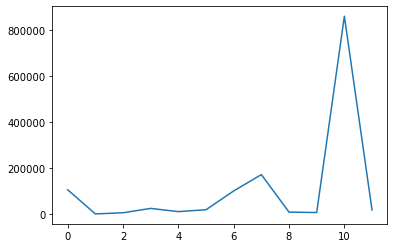

In [88]:
df['city'].plot()

<AxesSubplot:ylabel='Frequency'>

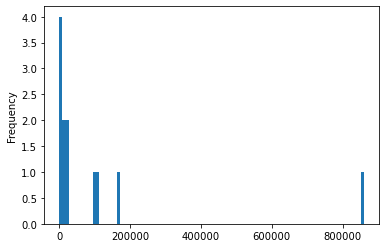

In [89]:
df['city'].plot.hist(bins=100)

In [90]:
df['education'].describe()

count    12.0000
mean      2.5000
std       0.6742
min       2.0000
25%       2.0000
50%       2.0000
75%       3.0000
max       4.0000
Name: education, dtype: float64

<AxesSubplot:ylabel='Frequency'>

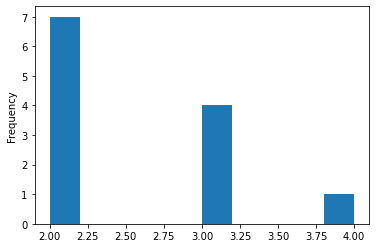

In [91]:
df['education'].plot.hist()

In [92]:
df['salary'].describe()

count    1.200000e+01
mean     4.170875e+06
std      1.443243e+07
min      3.000000e+03
25%      4.000000e+03
50%      4.000000e+03
75%      5.000000e+03
max      5.000000e+07
Name: salary, dtype: float64

<AxesSubplot:ylabel='Frequency'>

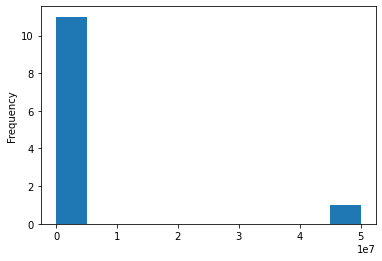

In [93]:
df['salary'].plot.hist()

In [94]:
clean_df=df.loc[df['salary']<100000]    # .loc = sert à filtrer selon certains criteres ds []
df.groupby(['age','gender']).agg({'salary': ['mean','min','max']})   # .agg = faie apparaitre le group by
                                                                     # avec le salaire moyen,min, max

salary                    
                                                 mean       min       max
age               gender                                                 
18 - 19 years old Man                    1.000000e+04     10000     10000
                  Woman                  4.000000e+03      4000      4000
20 - 21 years old Man                    4.000000e+03      4000      4000
                  Woman                  4.071429e+03      3000      5000
22 - 23 years old Do not wish to answer  5.000000e+07  50000000  50000000
23 - 24 years old Man                    4.000000e+03      4000      4000

In [95]:
df['siblings']

0     6
1     3
2     2
3     2
4     2
5     2
6     5
7     4
8     3
9     3
10    3
11    0
Name: siblings, dtype: int64

In [96]:
def recode_siblings(nbr):
    if nbr!=0: return nbr
    else: return 1

In [97]:
recode_siblings(0)

1

In [98]:
df['siblings'].map(recode_siblings)

0     6
1     3
2     2
3     2
4     2
5     2
6     5
7     4
8     3
9     3
10    3
11    1
Name: siblings, dtype: int64

In [99]:
df['age'].value_counts()

20 - 21 years old    8
18 - 19 years old    2
22 - 23 years old    1
23 - 24 years old    1
Name: age, dtype: int64

<AxesSubplot:>

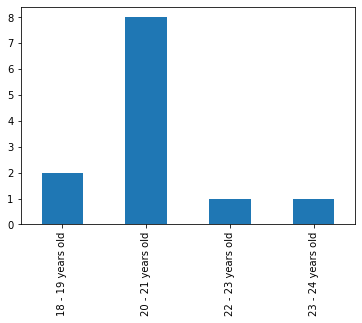

In [100]:
df['age'].value_counts().sort_index().plot.bar()

In [101]:
df['mother_edu_level']

0                     French baccalaureate
1                                  Licence
2                            Master or PhD
3     Do not wish to answer / can't answer
4     Do not wish to answer / can't answer
5                            Master or PhD
6                                  Licence
7                               No diploma
8                            Master or PhD
9                                  Licence
10    Do not wish to answer / can't answer
11                           Master or PhD
Name: mother_edu_level, dtype: object

In [102]:
d={'No diploma':0                                  #variables ordinales
  ,'French baccalaureate':1
  ,'Licence':2
   ,'Master or PhD':3}

df['father_edu_level']=df['father_edu_level'].map(d)
df['mother_edu_level']=df['mother_edu_level'].map(d)

In [103]:
df['parents_edu_level']=df['father_edu_level']+df['mother_edu_level']

In [104]:
df['parents_edu_level']

0     3.0
1     4.0
2     6.0
3     NaN
4     NaN
5     6.0
6     3.0
7     0.0
8     6.0
9     4.0
10    NaN
11    5.0
Name: parents_edu_level, dtype: float64

### size

In [105]:
df['size']

0           165
1        175 cm
2           171
3           170
4          1m60
5           167
6          1,65
7           160
8          1,88
9        161 cm
10          155
11    1, 78 cms
Name: size, dtype: object

In [106]:
t="1,78 cms"
def recode_size(t):
    x=""
    for cara in t:
        if cara.isdigit():
            x+=cara
    return int(x)

recode_size(t)

178

In [107]:
df['size']=df['size'].map(recode_size)

In [108]:
df['size']=df['size'].map(recode_size)

TypeError: 'int' object is not iterable

### gender

In [109]:
df['gender']

0                     Woman
1                     Woman
2                       Man
3                     Woman
4                     Woman
5                     Woman
6                     Woman
7     Do not wish to answer
8                       Man
9                     Woman
10                    Woman
11                      Man
Name: gender, dtype: object

In [110]:
df['gender'].value_counts()

Woman                    8
Man                      3
Do not wish to answer    1
Name: gender, dtype: int64

In [111]:
df['gender']=='Man'

0     False
1     False
2      True
3     False
4     False
5     False
6     False
7     False
8      True
9     False
10    False
11     True
Name: gender, dtype: bool

In [112]:
df.loc[df['gender']=='Man']

,city,education,salary,siblings,age,mother_edu_level,father_edu_level,size,gender,pets,tv_show,parents_edu_level
2,5000,2,10000,2,18 - 19 years old,3.0,3.0,171,Man,"Cat, Komodo dragon, Crocodile",Survivor,6.0
8,8000,3,4000,3,20 - 21 years old,3.0,3.0,188,Man,"Lion, chat, kangourou",Obx,6.0
11,17000,3,4000,0,23 - 24 years old,3.0,2.0,178,Man,"cat, fish, turtle",The ofice,5.0


In [113]:
df['salary']<4500

0      True
1      True
2     False
3      True
4      True
5     False
6     False
7     False
8      True
9      True
10     True
11     True
Name: salary, dtype: bool

In [114]:
df.loc[(df['gender']=='Woman') & (df['salary']>4500)]

,city,education,salary,siblings,age,mother_edu_level,father_edu_level,size,gender,pets,tv_show,parents_edu_level
5,18203,3,5000,2,20 - 21 years old,3.0,3.0,167,Woman,"Dog, sheep, goose",the Witcher,6.0
6,100000,2,5000,5,20 - 21 years old,2.0,1.0,165,Woman,"Cat, rabbit, dog",Television news,3.0


In [115]:
df['pets']

0                  BIRD, SNAKE, CAT
1                giraffe, cat, swan
2     Cat, Komodo dragon, Crocodile
3             dogs, parrot, hamster
4             dog,guinea pig,turtle
5                 Dog, sheep, goose
6                  Cat, rabbit, dog
7                je ne les aime pas
8             Lion, chat, kangourou
9                  Cat, rabbit, dog
10                              Cat
11                cat, fish, turtle
Name: pets, dtype: object

In [116]:
p="Cat; Komodoro dragon, Crocodile"
p.split(',')

['Cat; Komodoro dragon', ' Crocodile']

In [117]:
df[['pet1','pet2','pet3']]=df['pets'].str.lower().str.split(',',expand=True)   #pr animaux creation 3 col pour
                                                                               # chaque animal

In [118]:
df.head(1)

,city,education,salary,siblings,age,mother_edu_level,father_edu_level,size,gender,pets,tv_show,parents_edu_level,pet1,pet2,pet3
0,105142,2,3500,6,20 - 21 years old,1.0,2.0,165,Woman,"BIRD, SNAKE, CAT",le meilleur patissier,3.0,bird,snake,cat


### corrélation

In [119]:
def recode_gender(s):
    if s=="Woman":
        return 1
    elif s=="Man":
        return 0
    else : return None

In [120]:
df['gender_num']=df['gender'].map(recode_gender)

In [121]:
# Filtrez le df pour ne pas prendre les valeurs qui sont supérieures
# a la moyenne + 3 fois l'ecart type

In [122]:
df['salary'].mean()

4170875.0

In [123]:
df['salary'].std()

14432431.55996087

In [124]:
(df.loc[df['salary'].between
       (df['salary'].mean()-3*df['salary'].std(),
       df['salary'].mean()+3*df['salary'].std())])

,city,education,salary,siblings,age,mother_edu_level,father_edu_level,size,gender,pets,tv_show,parents_edu_level,pet1,pet2,pet3,gender_num
0,105142,2,3500,6,20 - 21 years old,1.0,2.0,165,Woman,"BIRD, SNAKE, CAT",le meilleur patissier,3.0,bird,snake,cat,1.0
1,40,2,4000,3,18 - 19 years old,2.0,2.0,175,Woman,"giraffe, cat, swan",brooklyn 99,4.0,giraffe,cat,swan,1.0
2,5000,2,10000,2,18 - 19 years old,3.0,3.0,171,Man,"Cat, Komodo dragon, Crocodile",Survivor,6.0,cat,komodo dragon,crocodile,0.0
3,24000,2,4000,2,20 - 21 years old,NaN,2.0,170,Woman,"dogs, parrot, hamster",Touche Pas A Mon Poste,NaN,dogs,parrot,hamster,1.0
4,10000,2,4000,2,20 - 21 years old,NaN,NaN,160,Woman,"dog,guinea pig,turtle",The Office,NaN,dog,guinea pig,turtle,1.0
5,18203,3,5000,2,20 - 21 years old,3.0,3.0,167,Woman,"Dog, sheep, goose",the Witcher,6.0,dog,sheep,goose,1.0
6,100000,2,5000,5,20 - 21 years old,2.0,1.0,165,Woman,"Cat, rabbit, dog",Television news,3.0,cat,rabbit,dog,1.0
8,8000,3,4000,3,20 - 21 years old,3.0,3.0,188,Man,"Lion, chat, kangourou",Obx,6.0,lion,chat,kangourou,0.0
9,6000,3,3000,3,20 - 21 years old,2.0,2.0,161,Woman,"Cat, rabbit, dog",Malcom in the middle,4.0,cat,rabbit,dog,1.0
10,860000,4,4000,3,20 - 21 years old,NaN,2.0,155,Woman,Cat,Le juste prix !,NaN,cat,None,None,1.0


In [125]:
def remove_outliers(s):
    return s.loc[s.between(s.mean()-3*s.std(),
                           s.mean()+3*s.std())]

In [126]:
remove_outliers(df['city'])

0     105142
1         40
2       5000
3      24000
4      10000
5      18203
6     100000
7     171057
8       8000
9       6000
11     17000
Name: city, dtype: int64

In [127]:
df.select_dtypes(include='number')

,city,education,salary,siblings,mother_edu_level,father_edu_level,size,parents_edu_level,gender_num
0,105142,2,3500,6,1.0,2.0,165,3.0,1.0
1,40,2,4000,3,2.0,2.0,175,4.0,1.0
2,5000,2,10000,2,3.0,3.0,171,6.0,0.0
3,24000,2,4000,2,NaN,2.0,170,NaN,1.0
4,10000,2,4000,2,NaN,NaN,160,NaN,1.0
5,18203,3,5000,2,3.0,3.0,167,6.0,1.0
6,100000,2,5000,5,2.0,1.0,165,3.0,1.0
7,171057,2,50000000,4,0.0,0.0,160,0.0,NaN
8,8000,3,4000,3,3.0,3.0,188,6.0,0.0
9,6000,3,3000,3,2.0,2.0,161,4.0,1.0


In [128]:
for i in df.select_dtypes(include='number'):
    print(i)

city
education
salary
siblings
mother_edu_level
father_edu_level
size
parents_edu_level
gender_num


In [129]:
suite=[0,1,2,3]
[el**2 for el in suite]

[0, 1, 4, 9]

In [130]:
([remove_outliers(df[s]) for s in 
 df.select_dtypes(include='number')])

[0     105142
 1         40
 2       5000
 3      24000
 4      10000
 5      18203
 6     100000
 7     171057
 8       8000
 9       6000
 11     17000
 Name: city, dtype: int64,
 0     2
 1     2
 2     2
 3     2
 4     2
 5     3
 6     2
 7     2
 8     3
 9     3
 10    4
 11    3
 Name: education, dtype: int64,
 0      3500
 1      4000
 2     10000
 3      4000
 4      4000
 5      5000
 6      5000
 8      4000
 9      3000
 10     4000
 11     4000
 Name: salary, dtype: int64,
 0     6
 1     3
 2     2
 3     2
 4     2
 5     2
 6     5
 7     4
 8     3
 9     3
 10    3
 11    0
 Name: siblings, dtype: int64,
 0     1.0
 1     2.0
 2     3.0
 5     3.0
 6     2.0
 7     0.0
 8     3.0
 9     2.0
 11    3.0
 Name: mother_edu_level, dtype: float64,
 0     2.0
 1     2.0
 2     3.0
 3     2.0
 5     3.0
 6     1.0
 7     0.0
 8     3.0
 9     2.0
 10    2.0
 11    2.0
 Name: father_edu_level, dtype: float64,
 0     165
 1     175
 2     171
 3     170
 4     160
 5     167


In [131]:
clean_num_series= ([remove_outliers(df[s])for s in
                   df.select_dtypes(include='number')])

In [132]:
num_df=pd.concat(clean_num_series, axis=1)

num_df.head(1)

In [133]:
num_df.fillna(1)

,city,education,salary,siblings,mother_edu_level,father_edu_level,size,parents_edu_level,gender_num
0,105142.0,2,3500.0,6,1.0,2.0,165,3.0,1.0
1,40.0,2,4000.0,3,2.0,2.0,175,4.0,1.0
2,5000.0,2,10000.0,2,3.0,3.0,171,6.0,0.0
3,24000.0,2,4000.0,2,1.0,2.0,170,1.0,1.0
4,10000.0,2,4000.0,2,1.0,1.0,160,1.0,1.0
5,18203.0,3,5000.0,2,3.0,3.0,167,6.0,1.0
6,100000.0,2,5000.0,5,2.0,1.0,165,3.0,1.0
7,171057.0,2,1.0,4,0.0,0.0,160,0.0,1.0
8,8000.0,3,4000.0,3,3.0,3.0,188,6.0,0.0
9,6000.0,3,3000.0,3,2.0,2.0,161,4.0,1.0


<AxesSubplot:ylabel='Density'>

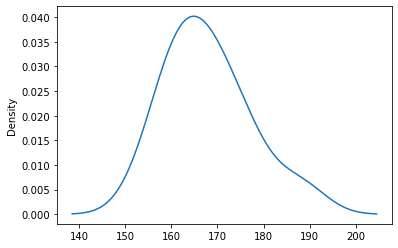

In [134]:
num_df['size'].plot(kind='kde')

In [135]:
df['size'].skew()

0.8448833301788213

In [136]:
d={'tomate':5,'courgette':3}
{k:v*5 for k,v in d.items()}

{'tomate': 25, 'courgette': 15}

In [137]:
#generer un dico avec noms colonnes en clé
#et comme valeurs soit moy si skew compris entre -1 et 1
#sinon mediane
{col:num_df[col].mean() 
 if -1<= num_df[col].skew() <=1
 else num_df[col].median()
 for col in num_df.columns}

{'city': 17000.0,
 'education': 2.0,
 'salary': 4000.0,
 'siblings': 2.9166666666666665,
 'mother_edu_level': 2.0,
 'father_edu_level': 2.0,
 'size': 167.91666666666666,
 'parents_edu_level': 4.0,
 'gender_num': 1.0}

In [138]:
num_df.fillna(mean_or_median_d)

NameError: name 'mean_or_median_d' is not defined

<AxesSubplot:>

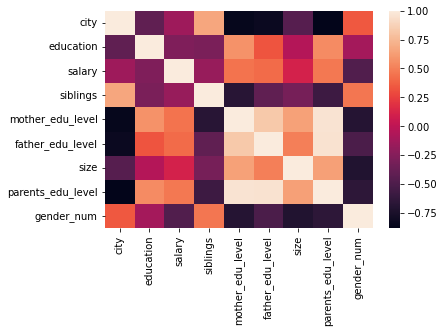

In [139]:
import seaborn as sns
sns.heatmap(num_df.corr())

<AxesSubplot:>

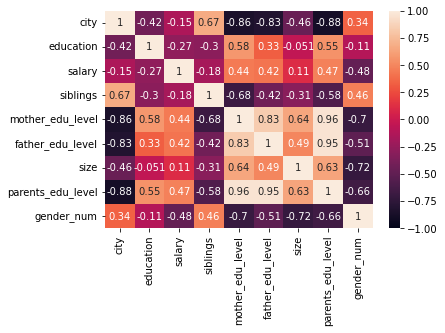

In [140]:
sns.heatmap(num_df.corr(), vmin=-1, vmax=1, annot=True)

In [141]:
%%time
sns.pairplot(num_df,
             diag_king='kde',
             kind='reg', 
             plot_kws={'color': 'red'})

TypeError: pairplot() got an unexpected keyword argument 'diag_king'

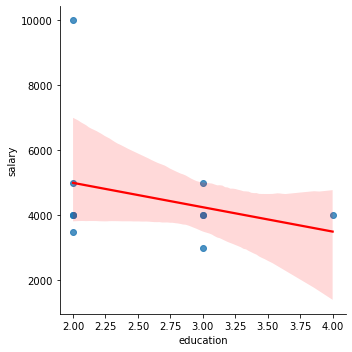

In [142]:
sns.lmplot(x='education',
          y='salary',
          data=num_df,
          fit_reg=True,
          line_kws={'color': 'red'})

## Jointure

In [143]:
df['name']=["Saint-Omer", "Montcalm", "La Bouilladisse", "Saint Genis Laval", 
            "Pélissanne","Bagnols-sur-Cèze", "Avignon", "Saint-Etienne",
           "Venelles", "Clermont de l'Oise","Marseille", "Digne-les-Bains",]

In [144]:
df['pop']=df['city']

In [145]:
df['city']=df['name']

In [146]:
df = df.drop(columns=['name'])

In [147]:
df['dept'] = ['62','30','13','69','13','30','84','42','13','60','13','04']

## Load population file

In [148]:
city_df= pd.read_excel("Population-par-commune-Excel.xlsx", skiprows=2)

In [149]:
city_df.head()

,Nom de la commune,Population totale,Département,Région
0,L'Abergement-Clémenciat,785,01,Auvergne-Rhône-Alpes
1,L'Abergement-de-Varey,244,01,Auvergne-Rhône-Alpes
2,Ambérieu-en-Bugey,14518,01,Auvergne-Rhône-Alpes
3,Ambérieux-en-Dombes,1705,01,Auvergne-Rhône-Alpes
4,Ambléon,116,01,Auvergne-Rhône-Alpes


In [150]:
# enlever tt les tirets, accents, maj, apostrophes, espaces

In [151]:
from unidecode import unidecode

def format_city(txt):
    return unidecode(txt.replace('-','').replace(' ','').replace("''",'').lower())

format_city("Saint -étienne")

'saintetienne'

In [152]:
df['format_city'] = df['city'].map(format_city)
city_df['format_city2'] = city_df['Nom de la commune'].map(format_city)

In [153]:
temp_df = pd.merge(df, city_df, left_on = ['format_city','dept'], 
         right_on = ['format_city2', 'Département'],
                   how = 'left')
temp_df

,city,education,salary,siblings,age,mother_edu_level,father_edu_level,size,gender,pets,...,pet3,gender_num,pop,dept,format_city,Nom de la commune,Population totale,Département,Région,format_city2
0,Saint-Omer,2,3500,6,20 - 21 years old,1.0,2.0,165,Woman,"BIRD, SNAKE, CAT",...,cat,1.0,105142,62,saintomer,Saint-Omer,15192.0,62,Hauts-de-France,saintomer
1,Montcalm,2,4000,3,18 - 19 years old,2.0,2.0,175,Woman,"giraffe, cat, swan",...,swan,1.0,40,30,montcalm,NaN,NaN,NaN,NaN,NaN
2,La Bouilladisse,2,10000,2,18 - 19 years old,3.0,3.0,171,Man,"Cat, Komodo dragon, Crocodile",...,crocodile,0.0,5000,13,labouilladisse,La Bouilladisse,6215.0,13,Provence-Alpes-Côte d'Azur,labouilladisse
3,Saint Genis Laval,2,4000,2,20 - 21 years old,NaN,2.0,170,Woman,"dogs, parrot, hamster",...,hamster,1.0,24000,69,saintgenislaval,Saint-Genis-Laval,22104.0,69,Auvergne-Rhône-Alpes,saintgenislaval
4,Pélissanne,2,4000,2,20 - 21 years old,NaN,NaN,160,Woman,"dog,guinea pig,turtle",...,turtle,1.0,10000,13,pelissanne,Pélissanne,10474.0,13,Provence-Alpes-Côte d'Azur,pelissanne
5,Bagnols-sur-Cèze,3,5000,2,20 - 21 years old,3.0,3.0,167,Woman,"Dog, sheep, goose",...,goose,1.0,18203,30,bagnolssurceze,Bagnols-sur-Cèze,18593.0,30,Occitanie,bagnolssurceze
6,Avignon,2,5000,5,20 - 21 years old,2.0,1.0,165,Woman,"Cat, rabbit, dog",...,dog,1.0,100000,84,avignon,Avignon,94200.0,84,Provence-Alpes-Côte d'Azur,avignon
7,Saint-Etienne,2,50000000,4,22 - 23 years old,0.0,0.0,160,Do not wish to answer,je ne les aime pas,...,None,NaN,171057,42,saintetienne,Saint-Étienne,174298.0,42,Auvergne-Rhône-Alpes,saintetienne
8,Venelles,3,4000,3,20 - 21 years old,3.0,3.0,188,Man,"Lion, chat, kangourou",...,kangourou,0.0,8000,13,venelles,Venelles,8539.0,13,Provence-Alpes-Côte d'Azur,venelles
9,Clermont de l'Oise,3,3000,3,20 - 21 years old,2.0,2.0,161,Woman,"Cat, rabbit, dog",...,dog,1.0,6000,60,clermontdel'oise,NaN,NaN,NaN,NaN,NaN


In [154]:
df.shape

(12, 19)

In [155]:
temp_df.shape

(12, 24)

In [156]:
temp_df.loc[temp_df.duplicated(subset= 'Population Totale')]

KeyError: Index(['Population Totale'], dtype='object')

In [158]:
temp_df.to_excel("final.xlsx",index=False)